In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
embeddings_dict = {}

with open("glove.6B/glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [3]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: 
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

In [4]:
print(find_closest_embeddings(
    embeddings_dict["house"]
)[:20])

['house', 'office', 'capitol', 'laid', 'new', 'raised', 'door', 'stand', 'manhattan', 'sitting', 'block', 'once', 'room', 'turned', 'hill', 'post', 'building', 'gates', 'lincoln', 'opened']


In [5]:
print(find_closest_embeddings(
    embeddings_dict["bread"]
)[:20])

['bread', 'baked', 'toast', 'soup', 'butter', 'cake', 'potato', 'pie', 'loaf', 'vegetable', 'flour', 'cheese', 'fries', 'tortilla', 'pizza', 'chicken', 'pancakes', 'sandwiches', 'potatoes', 'meal']


In [6]:
print(find_closest_embeddings(
    embeddings_dict["house"] + embeddings_dict["bread"]
)[:20])

['bread', 'house', 'cake', 'kitchen', 'small', 'baked', 'dinner', 'toast', 'coffee', 'breakfast', 'large', 'shop', 'chicken', 'filled', 'meal', 'pizza', 'whole', 'filling', 'lunch', 'fresh']


In [7]:
print(find_closest_embeddings(
    embeddings_dict["bread"] + embeddings_dict["house"] + embeddings_dict["ham"]
)[:20])

['bread', 'chicken', 'cheese', 'salad', 'cooked', 'baked', 'sandwich', 'soup', 'sausage', 'fried', 'pizza', 'ham', 'breakfast', 'sandwiches', 'fresh', 'steak', 'potatoes', 'meat', 'cook', 'onion']


In [8]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [9]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])

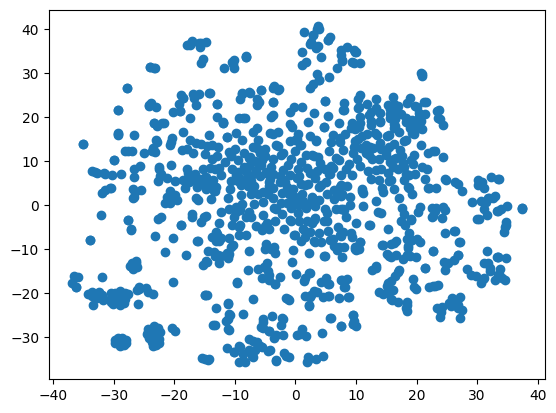

In [26]:
plt.scatter(Y[:, 0], Y[:, 1])

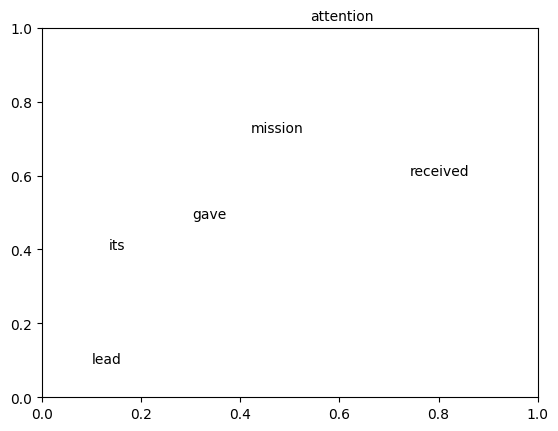

In [20]:
for label, x, y in zip(words, X[:, 1], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(4, 6), textcoords="offset points")
plt.show()